In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY':'b58a2a3b-fefe-45cc-9e06-3335d4d95df2',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-08-05T11:44:31.089Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9773}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9660, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [12]:
type(data)

dict

In [13]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b58a2a3b-fefe-45cc-9e06-3335d4d95df2',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    #if not os.path.isfile(r'C:\Users\JuliusMuthie\AppData\Local\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\JuliusMuthie\AppData\Local\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\JuliusMuthie\AppData\Local\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\JuliusMuthie\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()




API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9660,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19112925.00000,19112925.00000,NaN,1,NaN,NaN,NaN,2022-08-05T11:50:00.000Z,23381.18173,26737232760.42664,7.49570,0.72835,2.03210,-1.21187,16.38149,-25.49713,-35.15303,446882772893.65179,40.66670,491004816414.37000,NaN,2022-08-05T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-05 11:52:07.811753
1,1027,Ethereum,ETH,ethereum,5914,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121838440.49900,121838440.49900,NaN,2,NaN,NaN,NaN,2022-08-05T11:50:00.000Z,1708.87820,15735176747.00938,1.08580,2.56114,5.52442,1.73537,50.68851,-10.37740,-36.43102,208207055145.23920,18.94700,208207055145.23999,NaN,2022-08-05T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-05 11:52:07.811753
2,825,Tether,USDT,tether,37417,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66476525454.86423,69158976389.29054,NaN,3,NaN,NaN,NaN,2022-08-05T11:50:00.000Z,1.00015,46964498342.79398,4.25080,0.00022,-0.00574,-0.00873,0.11424,0.07760,0.02437,66486413252.54020,6.05030,69169263177.92000,NaN,2022-08-05T11:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-08-05 11:52:07.811753
3,3408,USD Coin,USDC,usd-coin,5164,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,54246924657.51538,54246924657.51538,NaN,4,NaN,NaN,NaN,2022-08-05T11:50:00.000Z,0.99987,5808271519.71124,-16.14010,-0.03379,-0.01169,-0.00975,-0.02169,-0.01054,-0.00920,54239894083.74908,4.93590,54239894083.75000,NaN,2022-08-05T11:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-08-05 11:52:07.811753
4,1839,BNB,BNB,bnb,1049,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-08-05T11:50:00.000Z,318.69979,1779059595.94744,-19.06080,-0.59132,5.81577,12.01331,34.71342,3.39367,-14.96961,51418151580.40172,4.67910,63739958436.16000,NaN,2022-08-05T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-05 11:52:07.811753
5,52,XRP,XRP,xrp,786,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, bin...",100000000000.00000,48343101197.00000,99989535142.00000,NaN,6,NaN,NaN,NaN,2022-08-05T11:50:00.000Z,0.37634,912285864.75955,-6.26690,0.34490,1.83190,2.12690,16.51563,-7.00449,-37.19662,18193408273.67816,1.65430,37633928778.25000,NaN,2022-08-05T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-05 11:52:07.811753
6,4687,Binance USD,BUSD,binance-usd,4426,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,17920140069.69926,17920140069.69926,NaN,7,NaN,NaN,NaN,2022-08-05T11:50:00.000Z,1.00007,5614695616.23625,-1.27590,-0.00592,0.00758,0.11869,-0.21882,-0.01124,0.00393,17921403454.94694,1.62960,17921403454.95000,NaN,2022-08-05T11:50:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-08-05 11:52:07.811753
7,2010,Cardano,ADA,cardano,537,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",45000000000.00000,33739028515.75500,34277702081.60500,NaN,8,NaN,NaN,NaN,2022-08-05T11:50:00.000Z,0.51635,506035159.01287,-1.36630,0.80599,2.79700,-1.85385,13.35589,-17.71194,-34.03793,17421055538.37510,1.58530,23235627512.53000,NaN,2022-08-05T11:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-08-05 11:52:07.81175

In [6]:

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.72835,2.03210,-1.21187,16.38149,-25.49713,-35.15303
Ethereum,2.56114,5.52442,1.73537,50.68851,-10.37740,-36.43102
Tether,0.00022,-0.00574,-0.00873,0.11424,0.07760,0.02437
USD Coin,-0.03379,-0.01169,-0.00975,-0.02169,-0.01054,-0.00920
BNB,-0.59132,5.81577,12.01331,34.71342,3.39367,-14.96961
XRP,0.34490,1.83190,2.12690,16.51563,-7.00449,-37.19662
Binance USD,-0.00592,0.00758,0.11869,-0.21882,-0.01124,0.00393
Cardano,0.80599,2.79700,-1.85385,13.35589,-17.71194,-34.03793
Solana,1.24145,5.87418,-1.94658,13.90626,-6.77497,-49.91841


In [7]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.72835
             quote.USD.percent_change_24h     2.03210
             quote.USD.percent_change_7d     -1.21187
             quote.USD.percent_change_30d    16.38149
             quote.USD.percent_change_60d   -25.49713
             quote.USD.percent_change_90d   -35.15303
Ethereum     quote.USD.percent_change_1h      2.56114
             quote.USD.percent_change_24h     5.52442
             quote.USD.percent_change_7d      1.73537
             quote.USD.percent_change_30d    50.68851
             quote.USD.percent_change_60d   -10.37740
             quote.USD.percent_change_90d   -36.43102
Tether       quote.USD.percent_change_1h      0.00022
             quote.USD.percent_change_24h    -0.00574
             quote.USD.percent_change_7d     -0.00873
             quote.USD.percent_change_30d     0.11424
             quote.USD.percent_change_60d     0.07760
             quote.USD.percent_change_90

In [8]:
type(df4)

pandas.core.series.Series

In [9]:
df5 = df4.to_frame(name = 'values')

In [10]:
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.72835
            quote.USD.percent_change_24h   2.03210
            quote.USD.percent_change_7d   -1.21187
            quote.USD.percent_change_30d  16.38149
            quote.USD.percent_change_60d -25.49713
            quote.USD.percent_change_90d -35.15303
Ethereum    quote.USD.percent_change_1h    2.56114
            quote.USD.percent_change_24h   5.52442
            quote.USD.percent_change_7d    1.73537
            quote.USD.percent_change_30d  50.68851
            quote.USD.percent_change_60d -10.37740
            quote.USD.percent_change_90d -36.43102
Tether      quote.USD.percent_change_1h    0.00022
            quote.USD.percent_change_24h  -0.00574
            quote.USD.percent_change_7d   -0.00873
            quote.USD.percent_change_30d   0.11424
            quote.USD.percent_change_60d   0.07760
            quote.USD.percent_change_90d   0.02437
USD Coin    quote.USD.percent_change_1h   -0.03379
            quote.USD.percent_change_24h  -0.01169
            quote.USD.percent_change_7d   -0.00975
            quote.USD.percent_change_30d  -0.02169
            quote.USD.percent_change_60d  -0.01054
            quote.USD.percent_change_90d  -0.00920
BNB         quote.USD.percent_change_1h   -0.59132
            quote.USD.percent_change_24h   5.81577
            quote.USD.percent_change_7d   12.01331
            quote.USD.percent_change_30d  34.71342
            quote.USD.percent_change_60d   3.39367
            quote.USD.percent_change_90d -14.96961
XRP         quote.USD.percent_change_1h    0.34490
            quote.USD.percent_change_24h   1.83190
            quote.USD.percent_change_7d    2.12690
            quote.USD.percent_change_30d  16.51563
            quote.USD.percent_change_60d  -7.00449
            quote.USD.percent_change_90d -37.19662
Binance USD quote.USD.percent_change_1h   -0.00592
            quote.USD.percent_change_24h   0.00758
            quote.USD.percent_change_7d    0.11869
            quote.USD.percent_change_30d  -0.21882
            quote.USD.percent_change_60d  -0.01124
            quote.USD.percent_change_90d   0.00393
Cardano     quote.USD.percent_change_1h    0.80599
            quote.USD.percent_change_24h   2.79700
            quote.USD.percent_change_7d   -1.85385
            quote.USD.percent_change_30d  13.35589
            quote.USD.percent_change_60d -17.71194
            quote.USD.percent_change_90d -34.03793
Solana      quote.USD.percent_change_1h    1.24145
            quote.USD.percent_change_24h   5.87418
            quote.USD.percent_change_7d   -1.94658
            quote.USD.percent_change_30d  13.90626
            quote.USD.percent_change_60d  -6.77497
            quote.USD.percent_change_90d -49.91841
Polkadot    quote.USD.percent_change_1h    1.43036
            quote.USD.percent_change_24h   5.74726
            quote.USD.percent_change_7d    8.11261
            quote.USD.percent_change_30d  23.85727
            quote.USD.percent_change_60d -13.05671
            quote.USD.percent_change_90d -40.00628
Dogecoin    quote.USD.percent_change_1h    0.78123
            quote.USD.percent_change_24h   5.05111
            quote.USD.percent_change_7d    1.53579
            quote.USD.percent_change_30d   4.13117
            quote.USD.percent_change_60d -16.36509
            quote.USD.percent_change_90d -45.28563
Polygon     quote.USD.percent_change_1h    1.05933
            quote.USD.percent_change_24h   5.13991
            quote.USD.percent_change_7d    1.02370
            quote.USD.percent_change_30d  80.93733
            quote.USD.percent_change_60d  44.74781
            quote.USD.percent_change_90d -11.35083
Dai         quote.USD.percent_change_1h    0.06387
            quote.USD.percent_change_24h   0.10136
            quote.USD.percent_change_7d    0.12406
            quote.USD.percent_change_30d   0.05296
            quote.USD.percent_change_60d   0.04838
            quo

In [12]:
df5.count()

values    90
dtype: int64

In [18]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.72835
1,Bitcoin,quote.USD.percent_change_24h,2.03210
2,Bitcoin,quote.USD.percent_change_7d,-1.21187
3,Bitcoin,quote.USD.percent_change_30d,16.38149
4,Bitcoin,quote.USD.percent_change_60d,-25.49713
5,Bitcoin,quote.USD.percent_change_90d,-35.15303
6,Ethereum,quote.USD.percent_change_1h,2.56114
7,Ethereum,quote.USD.percent_change_24h,5.52442
8,Ethereum,quote.USD.percent_change_7d,1.73537
9,Ethereum,quote.USD.percent_change_30d,50.68851


In [30]:
df7 = df6.rename(columns = {'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.72835
1,Bitcoin,quote.USD.percent_change_24h,2.03210
2,Bitcoin,quote.USD.percent_change_7d,-1.21187
3,Bitcoin,quote.USD.percent_change_30d,16.38149
4,Bitcoin,quote.USD.percent_change_60d,-25.49713
5,Bitcoin,quote.USD.percent_change_90d,-35.15303
6,Ethereum,quote.USD.percent_change_1h,2.56114
7,Ethereum,quote.USD.percent_change_24h,5.52442
8,Ethereum,quote.USD.percent_change_7d,1.73537
9,Ethereum,quote.USD.percent_change_30d,50.68851


In [31]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.72835
1,Bitcoin,24h,2.03210
2,Bitcoin,7d,-1.21187
3,Bitcoin,30d,16.38149
4,Bitcoin,60d,-25.49713
5,Bitcoin,90d,-35.15303
6,Ethereum,quote.USD.percent_change_1h,2.56114
7,Ethereum,24h,5.52442
8,Ethereum,7d,1.73537
9,Ethereum,30d,50.68851


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

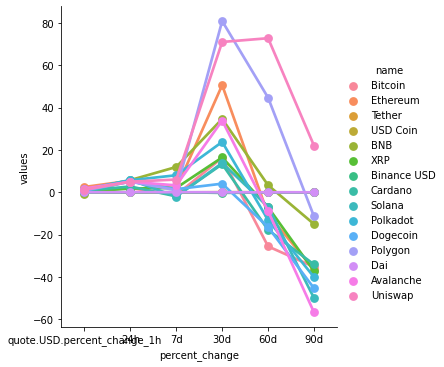

In [34]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [37]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Ethereum'")
df10

,name,quote.USD.price,timestamp
1,Ethereum,1708.87820,2022-08-05 11:52:07.811753


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

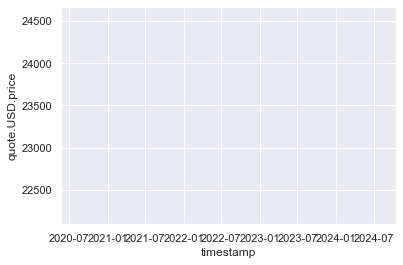

In [36]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)